# Transformada de Laplace

## Definición:

Es una función matemática que utilizaremos para trnasformar señales en el dominio temporal a un dominio de frecuencia generalizada, que llamaremos dominio transformado de *Laplace*. 

La transformada de Laplace se define como

$$F(s) = \mathcal{L}\{f(t)\} = \int_0^\infty f(t) e^{-st} \mathrm{dt} $$

donde $s$ es una variable compleja $s = \sigma + j\omega$.

## Antitransformada de Laplace
Se puede demostrar que tienendo la función transformada $F(s)$, se puede recuperar la función en el dominio temporal $f(t)$ aplicando la antitransforma de Laplace:

$$f(t)=\mathcal{L}^{-1}\{F(s)\} =\frac{1}{2\pi j} \int_{\sigma-j\omega}^{\sigma+j\omega} F(s) e^{st} ds .$$


<img style="display:block; margin-left: auto; margin-right: auto;" src="bg2.png" width="70%" alt="Tabla de tranformadas de Laplace">

## Propiedades de la Transformada de Laplace.
- **Linealindad**: $\mathcal{L}\{kf(t)\} = k F(s)$; $\mathcal{L}\{f_1(t)+f_2(t)\} = F_1(s)+F_2(s)$
- **Corrimiento en frecuencia**: $\mathcal{L}\{e^{-at}f(t)\}=F(s+a)$
- **Corrimiento en el tiempo**: $\mathcal{L}\{f(t-T)\}=e^{-sT}F(s)$
- **Escaleo Temporal**: $\mathcal{L}\{f(at)\}=\dfrac{1}{a}e^{-sT}F\left(\dfrac{s}{a}\right)$

- **Derivada**: $\mathcal{L}\left\{\dfrac{df(t)}{dt}\right\}=sF(s)-f(0)$
- **Derivada segunda**: $\mathcal{L} \left\{ \dfrac{d^2f(t)}{dt^2} \right\}=s^2F(s)-sf(0)-f'(0);$
- **Derivada de orden n**: $\mathcal{L} \left\{ \dfrac{d^nf(t)}{dt^n} \right\}= s^n F(s)- s^{n-1}f(0) - s^{n-2}f'(0) - \ldots - sf^{n-2}(0)-f^{n-1}(0)$
- **Integral**: $\mathcal{L} \left\{ \int_0^tf(\tau)d\tau \right\} =\dfrac{F(s)}{s}$
- **Teorema de valor final**: $f(\infty)=\lim_{s\rightarrow 0}sF(s)$
- **Teorema de valor inicial**: $f(0)=\lim_{s\rightarrow \infty}sF(s)$



## Cálculo de la transformada de Laplace mediante Sympy.

In [1]:
import sympy as sp
sp.init_printing()

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

Vamos a definir algunos símbolos para trabajar. Aquí usamos `Symbol` para poder especificar los dominios y las restricciones en los símbolos.

In [3]:
t = sp.Symbol('t')
s = sp.Symbol('s')
a = sp.Symbol('a', real=True, positive=True)

Comenzamos con una función simple.

In [4]:
f = sp.exp(-a*t)
f

Podemos evaluar la integral directamente usando `integra`:

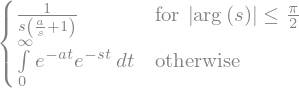

In [5]:
sp.integrate(f*sp.exp(-s*t), (t, 0, sp.oo))

Esto funciona, pero es un poco incómodo tener todas las condiciones de la transformada allí.

Sympy proporciona una función llamada `laplace_transform` que hace esto de manera más eficiente. Por defecto, también devolverá las condiciones de convergencia (recordar que esto es una integral impropia, con un límite infinito, por lo que no siempre convergerá).

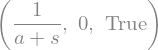

In [6]:
sp.laplace_transform(f, t, s)

Si queremos solo la función, podemos especificar `noconds = True`.

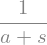

In [7]:
F = sp.laplace_transform(f, t, s, noconds=True)
F

Nos resultará útil definir una versión más rápida de esto:

In [8]:
def L(f):
    return sp.laplace_transform(f, t, s, noconds=True)

Los inversos son simples también,

In [9]:
def invL(F):
    return sp.inverse_laplace_transform(F, s, t)

In [10]:
invL(F)

La función de paso de unidad también se conoce como la función escalón o Heaviside. Veremos esta función a menudo en transformaciones inversas de laplace. Está tipografiado como $\theta(t)$ por sympy.

In [11]:
sp.Heaviside(t)

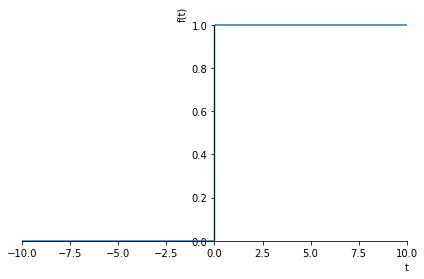

In [12]:
sp.plot(sp.Heaviside(t));

Mire la diferencia entre $f$ y la transformada inversa de lugar que obtuvimos, que contiene el paso unitario para forzarlo a cero antes de $t=0$.

In [13]:
invL(F).subs({a: 2})

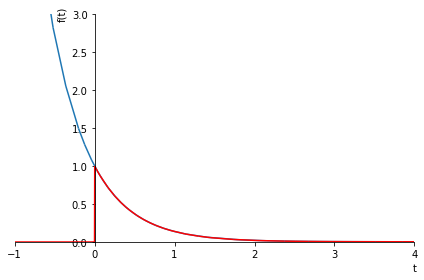

In [14]:
p = sp.plot(f.subs({a: 2}), invL(F).subs({a: 2}), 
               xlim=(-1, 4), ylim=(0, 3), show=False)
p[1].line_color = 'red'
p[1].line_color
p.show()

A ver si podemos igualar las funciones en la tabla.

In [15]:
omega = sp.Symbol('omega', real=True)
exp = sp.exp
sin = sp.sin
cos = sp.cos
functions = [1,
         t,
         exp(-a*t),
         t*exp(-a*t),
         t**2*exp(-a*t),
         sin(omega*t),
         cos(omega*t),
         1 - exp(-a*t),
         exp(-a*t)*sin(omega*t),
         exp(-a*t)*cos(omega*t),
         ]
functions

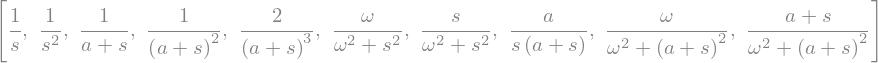

In [16]:
Fs = [L(f) for f in functions]
Fs

Podemos hacer una buena aproximación de la tabla con un poco de ayuda de pandas.

In [17]:
from pandas import DataFrame

In [18]:
def makelatex(args):
    return ["${}$".format(sp.latex(a)) for a in args]

In [19]:
LaplaceTable=DataFrame(list(zip(makelatex(functions), makelatex(Fs))),columns=['f(t)', 'F(s)'])
LaplaceTable

,f(t),F(s)
0,$1$,$\frac{1}{s}$
1,$t$,$\frac{1}{s^{2}}$
2,$e^{- a t}$,$\frac{1}{a + s}$
3,$t e^{- a t}$,$\frac{1}{\left(a + s\right)^{2}}$
4,$t^{2} e^{- a t}$,$\frac{2}{\left(a + s\right)^{3}}$
5,$\sin{\left(\omega t \right)}$,$\frac{\omega}{\omega^{2} + s^{2}}$
6,$\cos{\left(\omega t \right)}$,$\frac{s}{\omega^{2} + s^{2}}$
7,$1 - e^{- a t}$,$\frac{a}{s \left(a + s\right)}$
8,$e^{- a t} \sin{\left(\omega t \right)}$,$\frac{\omega}{\omega^{2} + \left(a + s\right)...
9,$e^{- a t} \cos{\left(\omega t \right)}$,$\frac{a + s}{\omega^{2} + \left(a + s\right)^...


Inversas más complicadas.
---------

¿Por qué la tabla no presenta funciones más complicadas? Debido a que las funciones racionales de orden superior se pueden escribir como sumas de funciones más simples mediante la aplicación de la expansión de fracciones parciales.

In [20]:
F = ((s + 1)*(s + 2)* (s + 3))/((s + 4)*(s + 5)*(s + 6))

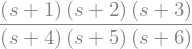

In [21]:
F

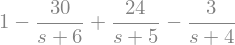

In [22]:
F.apart(s)

Incluso sympy puede beneficiarse de un poco de ayuda a veces. Cuando intentamos calcular el inverso de $F$ obtenemos una respuesta un tanto desagradable:

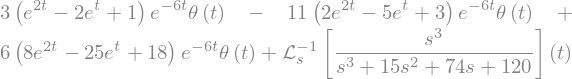

In [23]:
invL(F)

Tal vez se vea mejor si simplificamos?

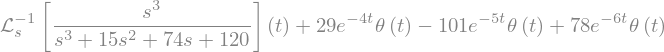

In [24]:
invL(F).simplify()

No, todavía presenta una transformada laplace "desconocida". Si hacemos primero la expansión de fracciones parciales, obtenemos una respuesta limpia:

In [25]:
invL(F.apart(s))